# Different normalization processes:

In [1]:
### All the packages we need:
%matplotlib inline
%load_ext rpy2.ipython

from Reader import Reader
from Randomforest import RandomForest_Autotunner,plot_matrix,Measure,check_rotate
from Traj_creator import Traj_data

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os.path
import cPickle as pkl


Code for files:
- H2B_ NORMALISED OR NOT (N or U) _ DIFF or not ( D or F(fraction)) or 0 or A all
Created files with orignal features $(X_t)_{t \in \textbf{N}}$ for a certain trajectory:
- H2B_U (or H2B_U_F_0) : $v_t=X_t$
- H2B_N_F_0 $v_t=\frac{X_t}{X_0}$
- H2B_N_F_A $v_t=\frac{X_t}{\bar{X}}$
- H2B_N_D_0 $v_t=X_t-X_0$
- H2B_N_D_A $v_t=X_t-\bar{X}$ (Like in panel data)

In [2]:
num_str="0015"  ## Well name

In [3]:
## Well name

if os.path.isfile("H2B_U_F_0.csv"):
    print "The file existed so I loaded it."
    H2B_U_F_0 = Traj_data(file_name="H2B_U_F_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_U_F_0.caract="Unnormalized"

else:    
    H2B_U_F_0=Traj_data() 

    H2B_U_F_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)

    H2B_U_F_0.Add_traj(normalize=False,all_traj=True,average=False,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_U_F_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_U_F_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_U_F_0.data.to_csv('H2B_U_F_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


/home/naylor/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (245) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
## Well name

if os.path.isfile("H2B_N_F_0.csv"):
    print "The file existed so I loaded it."
    H2B_N_F_0 = Traj_data(file_name="H2B_N_F_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_F_0.caract="Normalized by divided by first element"
else:    
    H2B_N_F_0=Traj_data() 

    H2B_N_F_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
    H2B_N_.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_F_0.Add_traj(normalize=True,all_traj=False,average=False,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_F_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_F_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.

    H2B_N_F_0.data.to_csv('H2B_N_F_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [5]:
## Well name

if os.path.isfile("H2B_N_D_0.csv"):
    print "The file existed so I loaded it."
    H2B_N_D_0 = Traj_data(file_name="H2B_N_D_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_D_0.caract="Normalized by subtracted by first element"

else:    
    H2B_N_D_0=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_D_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_D_0.Add_traj(normalize=True,all_traj=False,average=False,diff=True)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_D_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_D_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.

    H2B_N_D_0.data.to_csv('H2B_N_D_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [6]:
## Well name

if os.path.isfile("H2B_N_D_A.csv"):
    print "The file existed so I loaded it."
    H2B_N_D_A = Traj_data(file_name="H2B_N_D_A.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_D_A.caract="Normalized by subtracted by average"

else:    
    H2B_N_D_A=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_D_A.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_D_A.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_D_A.Add_traj(normalize=True,all_traj=True,average=True,diff=True)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_D_A.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_D_A.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    
    H2B_N_D_A.data.to_csv('H2B_N_D_A.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [7]:
## Well name

if os.path.isfile("H2B_N_F_A.csv"):
    print "The file existed so I loaded it."
    H2B_N_F_A = Traj_data(file_name="H2B_N_F_A.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_F_A.caract="Normalized by dividing by average"
else:    
    H2B_N_F_A=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_F_A.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_F_A.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_F_A.Add_traj(normalize=True,all_traj=True,average=True,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_F_A.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_F_A.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.

    H2B_N_F_A.data.to_csv('H2B_N_F_A.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [8]:
_rand_index_train=(random.sample(H2B_N_D_0.train.index,5))
_rand_col  = random.sample(H2B_N_D_0.names,5)
traj=0
obj=H2B_N_D_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
400,0.000000,0.000000,0.000000,0.000000,0.000000,5
473,0.332146,0.015835,-0.007143,-0.040851,0.185290,6
546,-0.380038,0.025887,-0.007852,-1.144810,0.207873,7
620,-0.524316,0.053469,-0.008416,-0.773607,0.299087,8
694,-0.503876,0.128967,-0.004899,-0.988956,0.829389,9


In [9]:
obj=H2B_N_D_A
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
0,-0.153856,-0.011157,-0.005188,0.255905,0.131589,0
71,-0.154065,0.001153,-0.005526,-0.822584,0.131589,1
140,-0.153470,-0.009315,-0.005449,0.196024,0.131589,2
211,-0.142141,-0.026508,-0.005158,-0.243939,0.131589,3
283,-0.148073,0.004877,-0.004651,0.250440,0.131589,4


In [10]:
obj=H2B_N_D_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
400,0.000000,0.000000,0.000000,0.000000,0.000000,5
473,0.332146,0.015835,-0.007143,-0.040851,0.185290,6
546,-0.380038,0.025887,-0.007852,-1.144810,0.207873,7
620,-0.524316,0.053469,-0.008416,-0.773607,0.299087,8
694,-0.503876,0.128967,-0.004899,-0.988956,0.829389,9


In [11]:
obj=H2B_N_F_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
400,1.000000,1.000000,1.000000,1.000000,1.000000,5
473,1.209264,1.166860,0.308260,0.995067,4.557711,6
546,0.760562,1.272775,0.239600,0.861749,4.991320,7
620,0.669662,1.563415,0.184963,0.906577,6.742686,8
694,0.682540,2.358953,0.525573,0.880570,16.924874,9


In [12]:
obj=H2B_N_F_A
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
0,0.136424,0.960018,0.355235,1.034057,1.151528,0
71,0.135250,1.004133,0.313139,0.890528,1.151528,1
140,0.138590,0.966619,0.322765,1.026088,1.151528,2
211,0.202180,0.905004,0.358965,0.967536,1.151528,3
283,0.168883,1.017478,0.421925,1.033329,1.151528,4


In [13]:
obj=H2B_U_F_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,granu_open_area_7,h4_2IDM,moment_I2,ls1_IRGL_sample_sd,h4_ASM,0015_id_frame
400,0.587209,0.094902,0.010326,8.280645,0.052081,5
473,0.919355,0.110737,0.003183,8.239795,0.237372,6
546,0.207171,0.120789,0.002474,7.135835,0.259955,7
620,0.062893,0.148371,0.001910,7.507039,0.351168,8
694,0.083333,0.223869,0.005427,7.291689,0.881470,9


In [14]:
list_obj=[ H2B_U_F_0, H2B_N_F_A, H2B_N_F_0, H2B_N_D_A, H2B_N_D_0]
kfold=3
D={}
instances_to_keep=H2B_N_F_0.train[pd.notnull(H2B_N_F_0.train.traj)].index
for obj in list_obj:
    if obj.Var_missing[0] in obj.train.columns:
        obj.missing_features_train()
    if obj.Var_missing[0] in obj.data.columns:
        obj.missing_features_data()
        
    #instances_to_keep=pd.notnull(obj.train.traj)

    values=[100 + i*10 for i in range(30)]

    model=RandomForest_Autotunner(values)

    model.tunning(obj.train.ix[instances_to_keep,obj.names],obj.train.ix[instances_to_keep,"Type"],kfold,plot=False,fit_new_model=True) #to get cm
    plt.show()

    i_=np.argmax(model.MSE)
    n_tree=values[i_]
 ##   print "For this caracteristic: "+obj.caract +", with n= "+ str(sum(instances_to_keep)) +"\n"
 ##   print "We now have a classifier with n=%d, with an expected accuracy of %5.3f for the normalized data. \n" %(n_tree,max(model.MSE))
 ##   plot_matrix(model.cm,title="Confusion matrix unnormalized with normalized data")
 ##   plt.show()
    model.cm_normalized = model.cm.astype('float') / model.cm.sum(axis=1)[:, np.newaxis]
 ##   plot_matrix(model.cm_normalized,title="Confusion matrix normalized with normalized data")
 ##   plt.show()
    D[obj.caract]={"tree_tunning":n_tree,
                   "best accuracy":max(model.MSE),
                   "Accuracy vector":model.MSE,
                   "Confusion matrix":model.cm,
                   "Normalized confusion matrix":model.cm_normalized,
                   "Training sample":str(obj.train.ix[instances_to_keep,obj.names].shape[0])
                  }
                  

Processing time: 50.667692 in sec
Processing time: 53.501670 in sec
Processing time: 54.524304 in sec
Processing time: 57.406865 in sec
Processing time: 56.187557 in sec


In [15]:
for ke in D.keys():
    tmp_dict=D[ke]
    print "Normalization process: "+ke 
    print "Accuracy score: #####    "+str(tmp_dict["best accuracy"])+"   #####"
    print "Effectif number: ####    "+str(tmp_dict["Training sample"])+" \n"

Normalization process: Normalized by divided by first element
Accuracy score: #####    0.777559055118   #####
Effectif number: ####    508 

Normalization process: Normalized by dividing by average
Accuracy score: #####    0.720472440945   #####
Effectif number: ####    508 

Normalization process: Normalized by subtracted by average
Accuracy score: #####    0.724409448819   #####
Effectif number: ####    508 

Normalization process: Unnormalized
Accuracy score: #####    0.714566929134   #####
Effectif number: ####    508 

Normalization process: Normalized by subtracted by first element
Accuracy score: #####    0.775590551181   #####
Effectif number: ####    508 



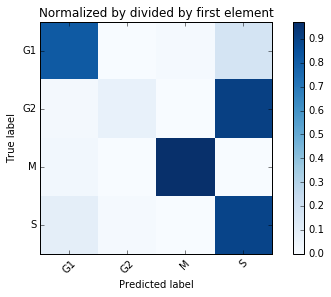

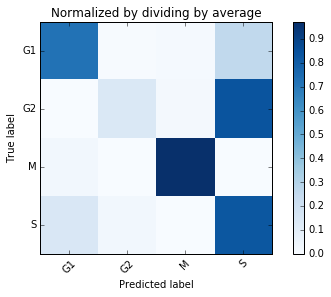

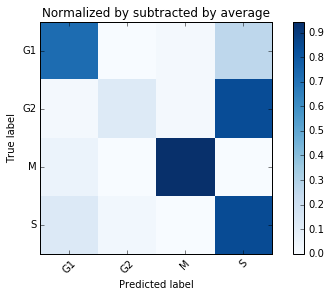

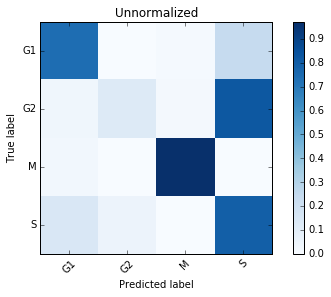

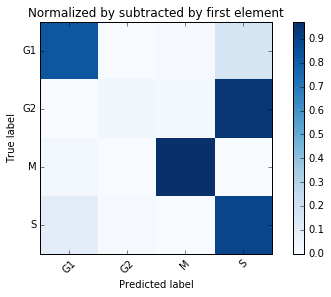

In [16]:
for ke in D.keys():
    tmp_dict=D[ke]
    plot_matrix(tmp_dict["Normalized confusion matrix"],title=ke)
    plt.show()

We are going to see how many isntances are removed from the original data when we filter out small trajectories.

Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member Group_of_traj
Updated member

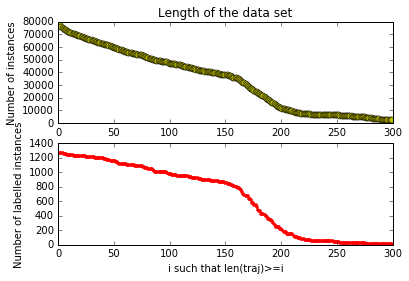

In [20]:
M=300
length_data =np.empty(M-1)
length_train=np.empty(M-1)
for i in range(1,M):
    H2B_N_F_A.filter_length_traj(i)
    length_data[i-1] =H2B_N_F_A.data.shape[0]
    length_train[i-1]=H2B_N_F_A.train.shape[0]


plt.subplot(2, 1, 1)
plt.plot(np.array(range(1,M)), length_data, 'yo-')
plt.title('Length of the data set')
plt.ylabel('Number of instances')

plt.subplot(2, 1, 2)
plt.plot(np.array(range(1,M)), length_train, 'r.-')
plt.xlabel('i such that len(traj)>=i')
plt.ylabel('Number of labelled instances')

plt.show()

In [19]:
## Well name

if os.path.isfile("H2B_N_F_A.csv"):
    print "The file existed so I loaded it."
    H2B_N_F_A = Traj_data(file_name="H2B_N_F_A.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_F_A.caract="Normalized by dividing by average"
else:    
    H2B_N_F_A=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_F_A.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_F_A.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_F_A.Add_traj(normalize=True,all_traj=True,average=True,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_F_A.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_F_A.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.

    H2B_N_F_A.data.to_csv('H2B_N_F_A.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [27]:
print H2B_N_F_A.data[pd.notnull(H2B_N_F_A.data.traj)].shape
print H2B_N_F_A.train[pd.notnull(H2B_N_F_A.train.traj)].shape

(47220, 242)
(1273, 242)
